# ***California Fire Detection Exploratory Analysis***




---


In [1]:
# Install the necessary packages
!pip install plotly
!pip install geopandas==0.3.0
!pip install pyshp==1.2.10
!pip install shapely==1.6.3
!pip install geopandas --upgrade
!pip install plotly-geo

     |████████████████████████████████| 888 kB 7.0 MB/s 
     |████████████████████████████████| 15.4 MB 16.5 MB/s 
     |████████████████████████████████| 6.3 MB 24.5 MB/s 
     |████████████████████████████████| 176 kB 8.3 MB/s 
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20493 sha256=50cd6a6595b2bc52ef0a5c9149a7a86234546ec5f7bcb471ecfdef708c8573e2
  Stored in directory: /root/.cache/pip/wheels/aa/cb/ed/c4af42e7718157f9a76dea841c585e0577742ffed5a5b17d32
Successfully built pyshp
     |████████████████████████████████| 223 kB 6.4 MB/s 
  Created wheel for shapely: filename=Shapely-1.6.3-cp37-cp37m-linux_x86_64.whl size=635707 sha256=0b8c2801d265ebdd5507ab39028abf065ae609adb85c4518188a322ee49f4119
  Stored in directory: /root/.cache/pip/wheels/89/9f/1e/de1b1c770313c6a9838cc9c4da4c59f5b2db78b34078d29d01
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.0
    Uninstalling Shapely-1.8.0:
      Successfully uni

In [5]:
import numpy as np
import math
import pandas as pd
# from sklearn.impute import SimpleImputer
# Plotting Data libraries
import matplotlib.pyplot as plt
import folium
import plotly.figure_factory as ff
import plotly.express as px

California is one of the places having the most deadliest and destructive wildfire seasons. The dataset contains the list of Wildfires that has occurred in California between 2013 and 2019. The dataset contains the location where wildfires have occurred including the County name, latitude and longitude values and also details on when the wildfire has started.

This data helps to generate insights on what locations in California are under fire threat, what time do Wildfires usually occur and how frequent and devastating they are!!

## **Explore Fires Dataset**

In [3]:
dataset = pd.read_csv('California_Fire_Cleaned.csv') # Read Cleaned California Fire Dataset
dataset.head(15)

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS
0,0,257314.0,Stanislaus National Forest/Yosemite National Park,2013,True,Tuolumne,55,2013-09-06 18:30:00,NaN,False,True,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,2013-08-17 15:25:00,Finalized,20 days 03:05:00,6109.0
1,1,30274.0,USFS Angeles National Forest/Los Angeles Count...,2013,True,Los Angeles,19,2013-06-08 18:30:00,NaN,False,True,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,2013-05-30 15:28:00,Finalized,9 days 03:02:00,6037.0
2,2,27531.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-07-30 18:00:00,NaN,False,True,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,2013-07-15 13:43:00,Finalized,15 days 04:17:00,6065.0
3,3,27440.0,Tahoe National Forest,2013,False,Placer,31,2013-08-30 08:00:00,NaN,False,True,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,2013-08-10 16:30:00,Finalized,19 days 15:30:00,6061.0
4,4,24251.0,Ventura County Fire/CAL FIRE,2013,True,Ventura,56,2013-05-11 06:30:00,NaN,False,True,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2013-05-02 07:01:00,Finalized,8 days 23:29:00,6111.0
5,5,22992.0,Sierra National Forest,2013,False,Fresno,10,2013-09-24 20:15:00,NaN,False,True,NaN,37.279000,Seven miles north of Big Creek,-119.318000,False,Aspen Fire,100.0,2013-07-22 22:15:00,Finalized,63 days 22:00:00,6019.0
6,6,20292.0,CAL FIRE Riverside Unit / San Bernardino Natio...,2013,True,Riverside,33,2013-08-12 18:00:00,NaN,False,True,26.0,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,True,Silver Fire,100.0,2013-08-07 14:05:00,Finalized,5 days 03:55:00,6065.0
7,7,14754.0,Klamath National Forest,2013,False,Siskiyou,47,2013-08-31 06:45:00,NaN,False,True,NaN,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,False,Salmon River Complex,100.0,2013-07-31 22:00:00,Finalized,30 days 08:45:00,6093.0
8,8,12503.0,Six Rivers National Forest,2013,False,Humboldt,12,2013-08-12 12:00:00,NaN,False,True,NaN,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,False,Corral Complex,100.0,2013-08-10 11:40:00,Finalized,2 days 00:20:00,6023.0
9,9,11429.0,CAL FIRE Tehama-Glenn Unit,2013,True,Tehama,52,2013-08-29 16:45:00,NaN,False,True,5.0,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,True,Deer Fire,100.0,2013-08-23 14:15:00,Finalized,6 days 02:30:00,6103.0


In [ ]:
dataset.columns

Index(['Unnamed: 0', 'AcresBurned', 'AdminUnit', 'ArchiveYear',
       'CalFireIncident', 'Counties', 'CountyIds', 'Extinguished',
       'Fatalities', 'Featured', 'Final', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained', 'Started',
       'Status', 'Active Time', 'FIPS'],
      dtype='object')

In [ ]:
dataset.dtypes

Unnamed: 0            int64
AcresBurned         float64
AdminUnit            object
ArchiveYear           int64
CalFireIncident        bool
Counties             object
CountyIds            object
Extinguished         object
Fatalities          float64
Featured               bool
Final                  bool
Injuries            float64
Latitude            float64
Location             object
Longitude           float64
MajorIncident          bool
Name                 object
PercentContained    float64
Started              object
Status               object
Active Time          object
FIPS                float64
dtype: object

In [24]:
# Plot a geospatial map using the folium library
map = folium.Map(location=[37.160317,-120.621407], tiles="Open Street Map", zoom_start=7, height = "75%", width = "100%")
for i in range(len(dataset)):
    folium.Circle(
        location=[dataset.loc[i,'Latitude'], dataset.loc[i,'Longitude']],
        radius=math.sqrt(float(dataset.loc[i,'AcresBurned'])*4046.86/math.pi), # Convert acres to meters as folium uses meters
        tooltip=str(dataset.loc[i,'Name'])+', '+str(dataset.loc[i,'ArchiveYear']),
        color="#d4763b",
        fill=True,
        fill_color="#d4763b",
    ).add_to(map)

# Give a title to the map
title_html = '''
             <h3 align="center" style="font-size:25px"><b>Geospatial distribution of wildfires in California</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))    
    
map

*Looking at the geospatial distribution of wildfires in California. Most of the small wildfires occur in areas away from larger forests. Most of them occur near mountains (zoom into to see this)* \
\
*Note : Some of the data is shown to be in areas outside the state of California. We will make sure to clean them for modeling purposes.*


In [7]:
v = dataset[['Counties','FIPS']].value_counts().to_frame() # Count the number of times fire occurs in each county
v = v.reset_index()
v.columns =  ['County', 'FIPS', 'TotalFires'] # Rename the count to 'TotalFires'

In [8]:
v = v.dropna(how='any',axis=0) 

values = v['TotalFires'].tolist()
fips = v['FIPS'].tolist()

# Use plotly.figure_factory to create a choroleth map
endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#c2ddff","#2b82ed","#0057a3","#000000","#c2ddff"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=False,
    # Give it some colors for visualization purposes
    plot_bgcolor='rgb(245, 245, 245)',
    paper_bgcolor='rgb(245, 245, 245)',
    legend_title='Total Fires by County',
    county_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    state_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    show_hover=True,
    exponent_format=True,
)
fig.layout.template = None
fig.show()

In [10]:
v = dataset.groupby(['Counties','FIPS'])['AcresBurned'].sum().to_frame()
v = v.reset_index()
v.columns =  ['County', 'FIPS', 'AcresBurned']

v = v.dropna(how='any',axis=0) 

values = v['AcresBurned'].tolist()
fips = v['FIPS'].tolist()

# Use plotly.figure_factory to create a choroleth map
endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#c2ddff","#2b82ed","#0057a3","#000000","#c2ddff"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=False,
    # Give it some colors for visualization purposes
    plot_bgcolor='rgb(245, 245, 245)',
    paper_bgcolor='rgb(245, 245, 245)',
    legend_title='Total Acres Burned by County',
    county_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    state_outline={'color': 'rgb(181, 181, 181)', 'width': 1},
    show_hover=True,
)
fig.layout.template = None
fig.show()



1.   *Riverside had the most wild fires* *Imperial County did not have any wild fires*
2.   *Imperial County did not have any wild fires*



When we did some research online we realized that imperial county during the 2017 and 2018 did acutally not have any fires. We could find more information for the other years, since the cal fire department does not keep a public record. We can ofcourse request to see this data but it is unsure if it is something they will give out to us.


1.   https://www.fire.ca.gov/incidents/2017/
2.   https://www.fire.ca.gov/media/11146/2018_redbook_final.pdf



*Proof that imperial county did not have any wild fires and or acres burned (according to the provided dataset*

In [11]:
v = dataset.groupby(['Counties','FIPS'])['AcresBurned'].sum().to_frame()

In [12]:
v[v['AcresBurned'] == 0]

,,AcresBurned
Counties,FIPS,
Alpine,6003.0,0.0


In [13]:
dataset[dataset["Counties"] == "Imperial"] # Proof that imperial county did not have wild fires

,Unnamed: 0,AcresBurned,AdminUnit,ArchiveYear,CalFireIncident,Counties,CountyIds,Extinguished,Fatalities,Featured,Final,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,Started,Status,Active Time,FIPS


In [14]:
len(dataset[dataset["Counties"] == "Riverside"]) # Total number of wilfires that occured in Riverside county

146

In [30]:
# Create a month column which has the month value of when the fire started
dataset['Month'] = [i.month for i in pd.to_datetime(dataset['Started'])] 
# Count the total number of fires that occured in each county grouped by year and month
new_Data = dataset.groupby(['ArchiveYear', 'Month'])['Counties'].count().reset_index()
new_Data.rename(columns = {"Counties" : "Wild Fire Count"}, inplace = True)

In [31]:
# plot the above data
fig = px.line(new_Data, x="Month", y="Wild Fire Count", color = "ArchiveYear", title='Wild Fire Frequency over the month in a given year')
fig.show()

More wild fires seem to be occuring during the summer time. Makes sense as during this time the temperatures are high and it is more dry making wild fires a more likely occurence.

In [32]:
# Count the total acres burned due to wildfires grouped by year and month
new_Data = dataset.groupby(['ArchiveYear', 'Month'])['AcresBurned'].sum().reset_index()

In [33]:
# plot the above data
fig = px.line(new_Data, x="Month", y="AcresBurned", color = "ArchiveYear", title='Total Acres Burned over the month in a given year')
fig.show()

In [34]:
# Count the total acres burned due to wildfires each by year and plot the data
new_Data = dataset.groupby(['ArchiveYear'])['AcresBurned'].sum().reset_index()
fig = px.line(new_Data, x="ArchiveYear", y="AcresBurned", title='Total Acres Burned over a given year')
fig.show()

As before more acres are burned during the summer time similar how most wild fires occured during the summer time. In this case during the year of 2018 we saw the most number of collective acres burned. This means that summer time is most vulnerable time for California for vast number of wilfires as will as the greatest devastation.

## **Explore Weather dataset**

In [25]:
weather = pd.read_csv("weather_data.csv", index_col = 0) # Read Cleaned Weather Dataset

In [26]:
# Calculate the average humidity of each of the 5 days before the fire started (which is then stored in a column)
weather['hum avg'] = (weather["Humidity Day One"] + weather['Humidity Day Two'] + weather['Humidity Day Three'] + weather['Humidity Day Four'] + weather['Humidity Day Five'])/5

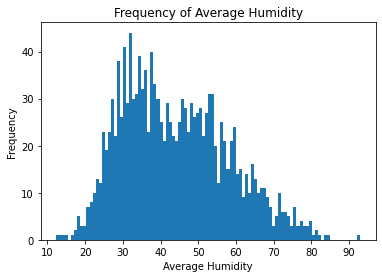

In [27]:
# Plot a historgram of the average humidity to see the distribution
plt.hist(weather['hum avg'], bins = 100)
plt.title("Frequency of Average Humidity")
plt.xlabel("Average Humidity")
plt.ylabel("Frequency")
plt.show()

*When most of the fires occur, the average humidity of the last 5 days before is less than 50%. This is very much interesting as lower the humidity meeans greater tha chance of fire spreading more quickly or forming in the first place*

In [28]:
# Calculate the average temperature of each of the 5 days before the fire started (which is then stored in a column)
weather['temp avg'] = (weather["Temp Day One"] + weather['Temp Day Two'] + weather['Temp Day Three'] + weather['Temp Day Four'] + weather['Temp Day Five'])/5

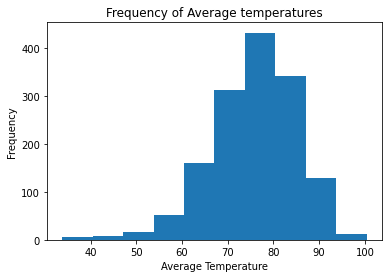

In [29]:
# Plot a historgram of the average temperature to see the distribution
plt.hist(weather['temp avg'], bins = 10)
plt.title("Frequency of Average temperatures")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

*When most of the fires occur, the average temperature of the last 5 days before is more than 70 F. Sometimes, it even hits 90 F.*

In [35]:
# Create a month column which has the month value of when the fire started
weather['Month'] = [i.month for i in pd.to_datetime(weather['Started'])]
# Create a year column which has the year value of when the fire started
weather['Year'] = [i.year for i in pd.to_datetime(weather['Started'])]
new_Data = weather.groupby(['Year', 'Month'])['temp avg'].mean().reset_index() # Group the data by year and month and take the 'temp avg' mean
new_Data.rename(columns = {'temp avg':'Average Temperature'}, inplace = True)

# plot the data
fig = px.line(new_Data, x="Month", y="Average Temperature", color = 'Year', title='Average Temperatures over the months in a given year')
fig.show()

In [36]:
# Create a month column which has the month value of when the fire started
weather['Month'] = [i.month for i in pd.to_datetime(weather['Started'])]
# Create a year column which has the year value of when the fire started
weather['Year'] = [i.year for i in pd.to_datetime(weather['Started'])]
new_Data = weather.groupby(['Year', 'Month'])['hum avg'].mean().reset_index() # Group the data by year and month and take the 'hum avg' mean
new_Data.rename(columns = {'hum avg':'Average Humidity'}, inplace = True)

# plot the data
fig = px.line(new_Data, x="Month", y="Average Humidity", color = 'Year', title='Average humidity over the months in a given year')
fig.show()

*These two graphs show an interesting pattern. During the summer time the average temperature is high and the humidity is low (certain other months throughout the year have smaller avg humidity but low avg temperature as well). And this is very much consistent with the previous graphs where we observed that most of the wild fires occur during the summer time.*


Text(0.5, 1.0, 'Day Five')

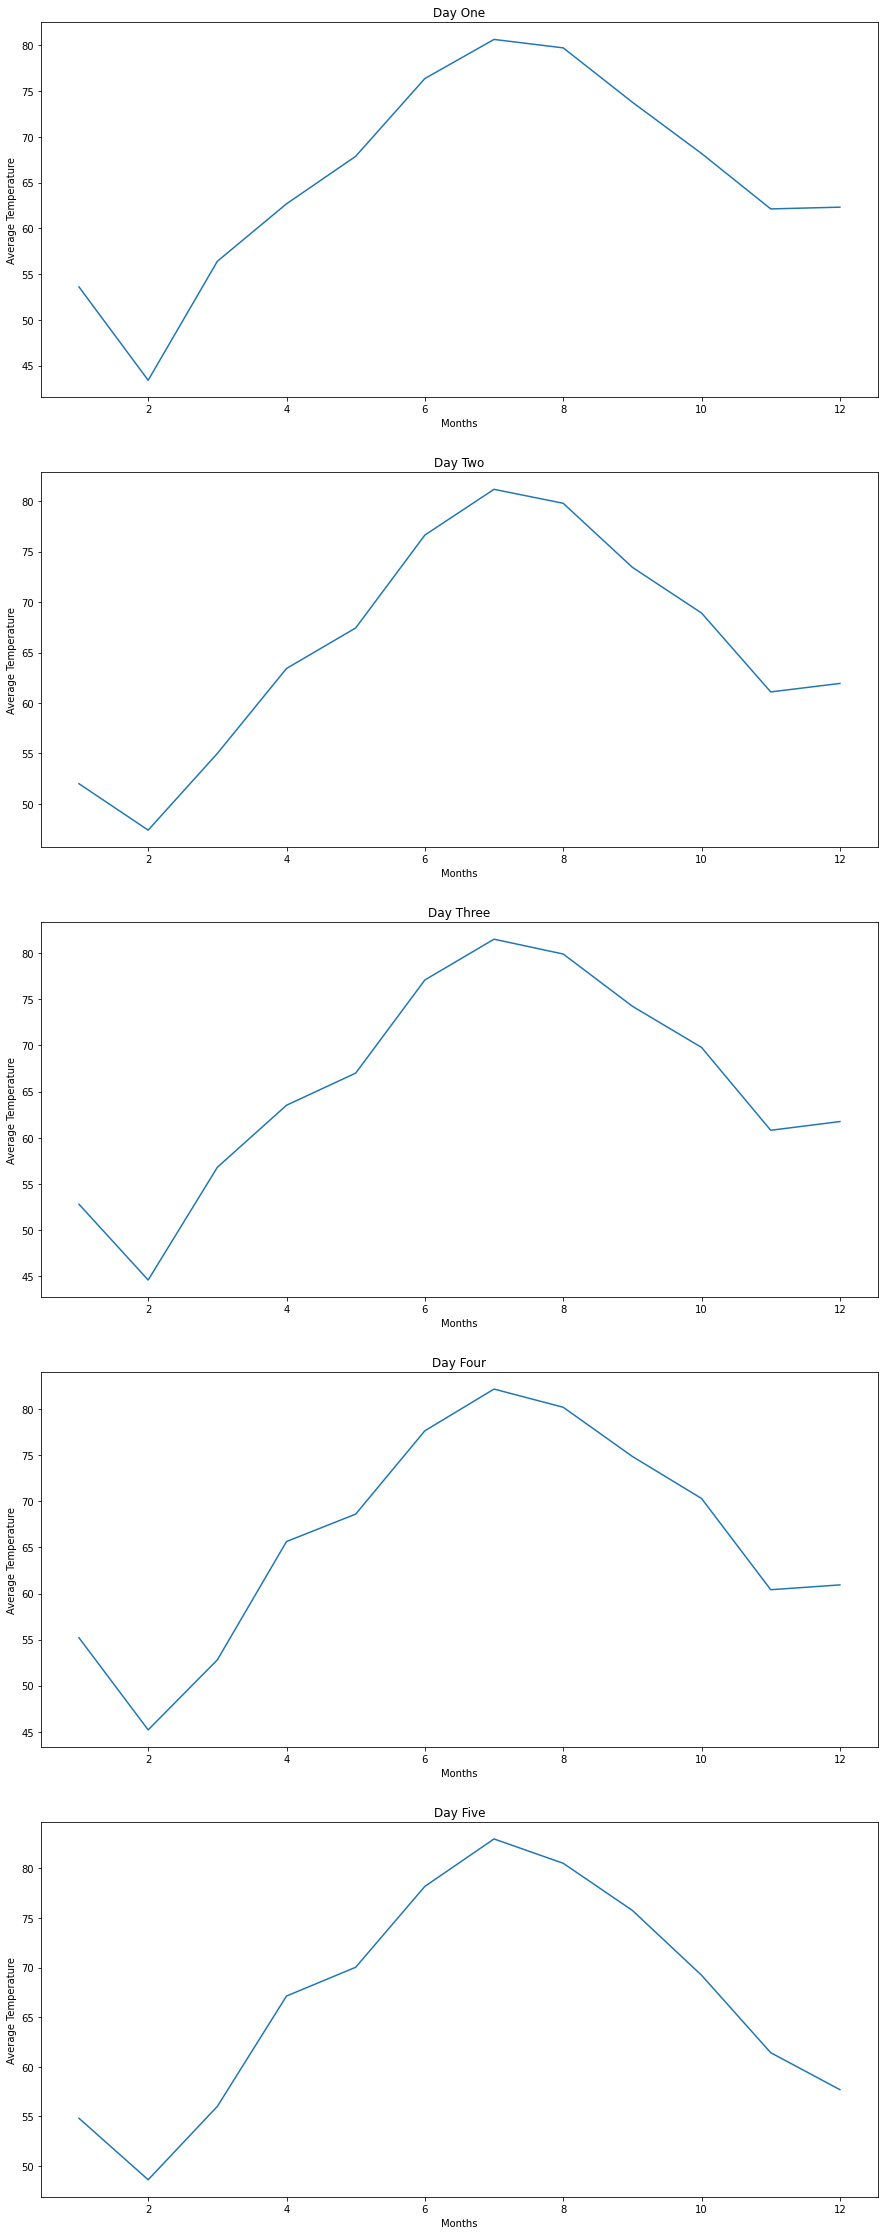

In [37]:
plt.subplots(5, 1, figsize=(15,40)) # Create a subplot

# Plot each of the 5 days temperatures mean grouped by month
plt.subplot(5, 1, 1)
new_Data = weather.groupby(['Month'])['Temp Day One'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day One'])
plt.title("Day One")
plt.xlabel("Months")
plt.ylabel("Average Temperature")

plt.subplot(5, 1, 2)
new_Data_One = weather.groupby(['Month'])['Temp Day Two'].mean().reset_index()
plt.plot(new_Data_One['Month'], new_Data_One['Temp Day Two'])
plt.title("Day Two")
plt.xlabel("Months")
plt.ylabel("Average Temperature")

plt.subplot(5, 1, 3)
new_Data_Two = weather.groupby(['Month'])['Temp Day Three'].mean().reset_index()
plt.plot(new_Data_Two['Month'], new_Data_Two['Temp Day Three'])
plt.title("Day Three")
plt.xlabel("Months")
plt.ylabel("Average Temperature")

plt.subplot(5, 1, 4)
new_Data = weather.groupby(['Month'])['Temp Day Four'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day Four'])
plt.title("Day Four")
plt.xlabel("Months")
plt.ylabel("Average Temperature")

plt.subplot(5, 1, 5)
new_Data = weather.groupby(['Month'])['Temp Day Five'].mean().reset_index()
plt.plot(new_Data['Month'], new_Data['Temp Day Five'])
plt.xlabel("Months")
plt.ylabel("Average Temperature")

plt.title("Day Five")

*The interesting thing is that each of the days before a fire occured, the avg temperature over the month over the years looks the same. Not sure if it is a coincidence but it is something worth exploring.* \
*This is very odd because although we expect to be somewhat be the same throughout the years, the facts that the average of all the days are the same is very strange.*

### In conclusion, during our exploration of the datasets we came to certain conclusions. The first of which was that most of the wildfires occur during the summer time. This statement was furthur reinforced with our observation that during the summer times the average humidity is very low and the average temperatures are very high. The second observation we made was that the average temperature of the 5 days before the fire started throughout the month over the years are the same. Now we do not know why this is, but it is something that needs furthur exploration. Lastly, we noticed that within the geospatial data certain wilfires seems to be occuring in the same areas, again not sure why as of yet. But furthur exploration could provide some explanation into this as well the other things we identified.